<p style="font-size:150%;font-weight:bold;text-align:center">🐚 ABALONE AGE PREDICTION 🐚</p>

<p style="font-size:120%;font-weight:bold;text-align:left">1. Importing</p>

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
df = pd.read_csv('data/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [264]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3327,I,0.635,NaN,0.200,1.3655,0.6255,0.2595,0.425,16
1121,M,0.545,0.410,0.120,0.7930,0.4340,0.1405,0.190,9
1526,M,0.705,0.560,0.165,1.6750,0.7970,0.4095,0.388,10
3848,F,0.675,0.535,0.220,1.6040,0.6175,0.4255,0.453,14
2874,I,0.425,0.340,0.100,0.3710,0.1500,0.0865,0.115,8


Predict the age of abalone from physical measurements

- <b>Sex</b> - nominal - M, F, and I (infant)

- <b>Length</b> - continuous - mm - Longest shell measurement

- <b>Diameter</b> - continuous - mm - perpendicular to length

- <b>Height</b> - continuous - mm - with meat in shell

- <b>Whole weight</b> - continuous - grams - whole abalone

- <b>Shucked weight</b> - continuous - grams - weight of meat

- <b>Viscera weight</b> - continuous - grams - gut weight (after bleeding)

- <b>Shell weight</b> - continuous - grams - after being dried

- <b>Rings</b> - integer - +1.5 gives the age in years (target)

<p style="font-size:120%;font-weight:bold;text-align:left">2. Data Pre-Processing</p>

In [265]:
df.shape

(4177, 9)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [267]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


- There are missing values in the dataset (Diameter, Whole weight, Shell weight)
- All numerical features except 'Sex'
- Height has 0 minimum (needs re-check)

In [268]:
df[df['Height'] < (df['Height'].min() + 0.02)].sort_values(by='Height')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8
3996,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4


I decided to see what data corresponds to instances with heights close to the minimum; they seem realistic. Perhaps, the zeros are related to measurement precision. I think it's possible to leave them as they are.

In [269]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


In [270]:
df.duplicated().sum()

0

No any doubles

I decided to add one more column for Age in years and remove the Rings column as it is equivalent to Age

In [271]:
df['Age'] = df['Rings'] + 1.5
df = df.drop('Rings', axis=1)

In [272]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


<p style="font-size:120%;font-weight:bold;text-align:left">3. One-factor analysis</p>

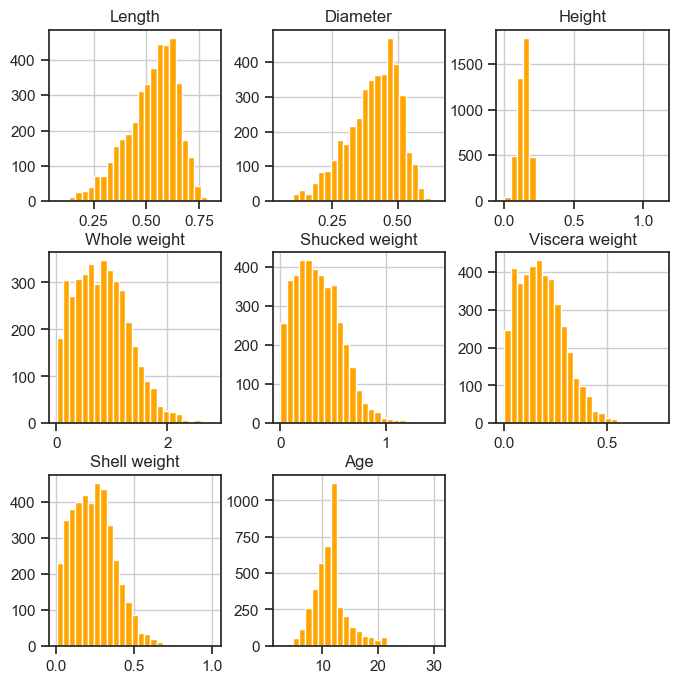

In [273]:
df.hist(bins=25, figsize=(8,8), color='orange');

In [274]:
df.isnull().mean() * 100

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Age               0.000000
dtype: float64

There are missing values that can be filled with the median. Initially, I decided to inspect the data because the identical percentage of missing values for diameter and weight seemed suspicious. However, visually, everything seems fine with the data.

In [275]:
df[df.Diameter.isnull()].sample(7)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
304,F,0.470,NaN,0.130,0.4720,0.1820,0.1140,0.1500,11.5
3335,F,0.425,NaN,0.135,0.3820,0.1465,0.0790,0.1400,13.5
2014,f,0.470,NaN,0.105,0.4410,0.1670,0.0865,0.1450,11.5
1065,I,0.315,NaN,0.055,0.1510,0.0650,0.0270,0.0390,7.5
2442,M,0.475,NaN,0.125,0.4625,0.1860,0.1070,0.1450,10.5
1221,I,0.330,NaN,0.095,0.1595,0.0770,0.0320,0.0435,6.5
3327,I,0.635,NaN,0.200,1.3655,0.6255,0.2595,0.4250,17.5


In [276]:
df[df['Whole weight'].isnull()].sample(7)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1167,M,0.620,0.470,0.135,NaN,0.5315,0.2005,0.2475,9.5
2977,I,0.430,0.330,0.100,NaN,0.2540,0.0825,0.0970,7.5
2140,F,0.450,0.360,0.125,NaN,0.2220,0.1050,0.1600,11.5
1225,I,0.345,0.255,0.085,NaN,0.1050,0.0370,0.0500,6.5
2851,F,0.635,0.510,0.185,NaN,0.5260,0.2950,0.4105,13.5
929,I,0.440,0.345,0.130,NaN,0.2090,0.0835,0.1340,7.5
3840,F,0.530,0.410,0.145,NaN,0.3750,0.2040,0.2450,10.5


In [277]:
df[df['Shell weight'].isnull()].sample(7)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
2349,F,0.450,0.360,0.105,0.4715,0.2035,0.0935,NaN,10.5
3169,M,0.560,0.450,0.155,0.9125,0.3595,0.2710,NaN,11.5
3469,F,0.715,0.585,0.230,2.0725,0.8655,0.4095,NaN,11.5
4015,M,0.635,0.480,0.145,1.1810,0.6650,0.2290,NaN,11.5
3749,I,0.430,0.330,0.095,0.3200,0.1180,0.0650,NaN,8.5
2632,I,0.415,0.315,0.100,0.3645,0.1765,0.0795,NaN,9.5
3138,M,0.510,0.400,0.140,0.6905,0.2590,0.1510,NaN,11.5


In [278]:
median_diameter = df['Diameter'].median()
median_whole_weight = df['Whole weight'].median()
median_shell_weight = df['Shell weight'].median()

In [279]:
df['Diameter'].fillna(median_diameter, inplace=True)
df['Whole weight'].fillna(median_whole_weight, inplace=True)
df['Shell weight'].fillna(median_shell_weight, inplace=True)

Checking dataset

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


All's good

In [281]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


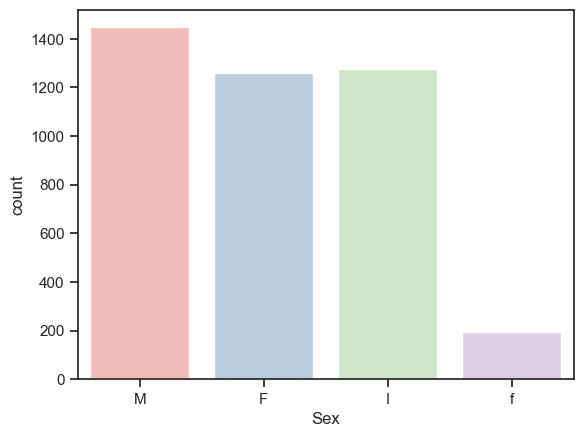

In [282]:
sns.countplot(x = 'Sex', data = df, hue='Sex', palette='Pastel1');

Need to correct f to F, as an obvious misclick

In [283]:
df['Sex'] = df['Sex'].replace('f', 'F')

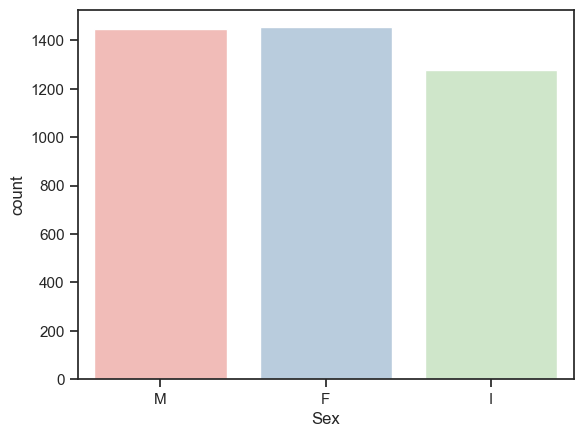

In [284]:
sns.countplot(x = 'Sex', data = df, hue='Sex',palette='Pastel1' );

Checkng the target Age more precisely

<Axes: xlabel='count', ylabel='Age'>

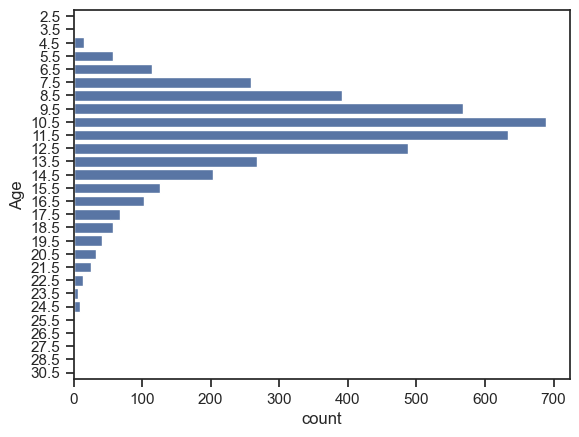

In [285]:
sns.countplot(data=df, y='Age')

The distribution looks like a normal distribution but with a leftward shift. This may cause issues during training; it might be necessary to handle the tails separately.

<p style="font-size:120%;font-weight:bold;text-align:left">4. Parameters and correlations</p>

<Axes: xlabel='Sex', ylabel='Age'>

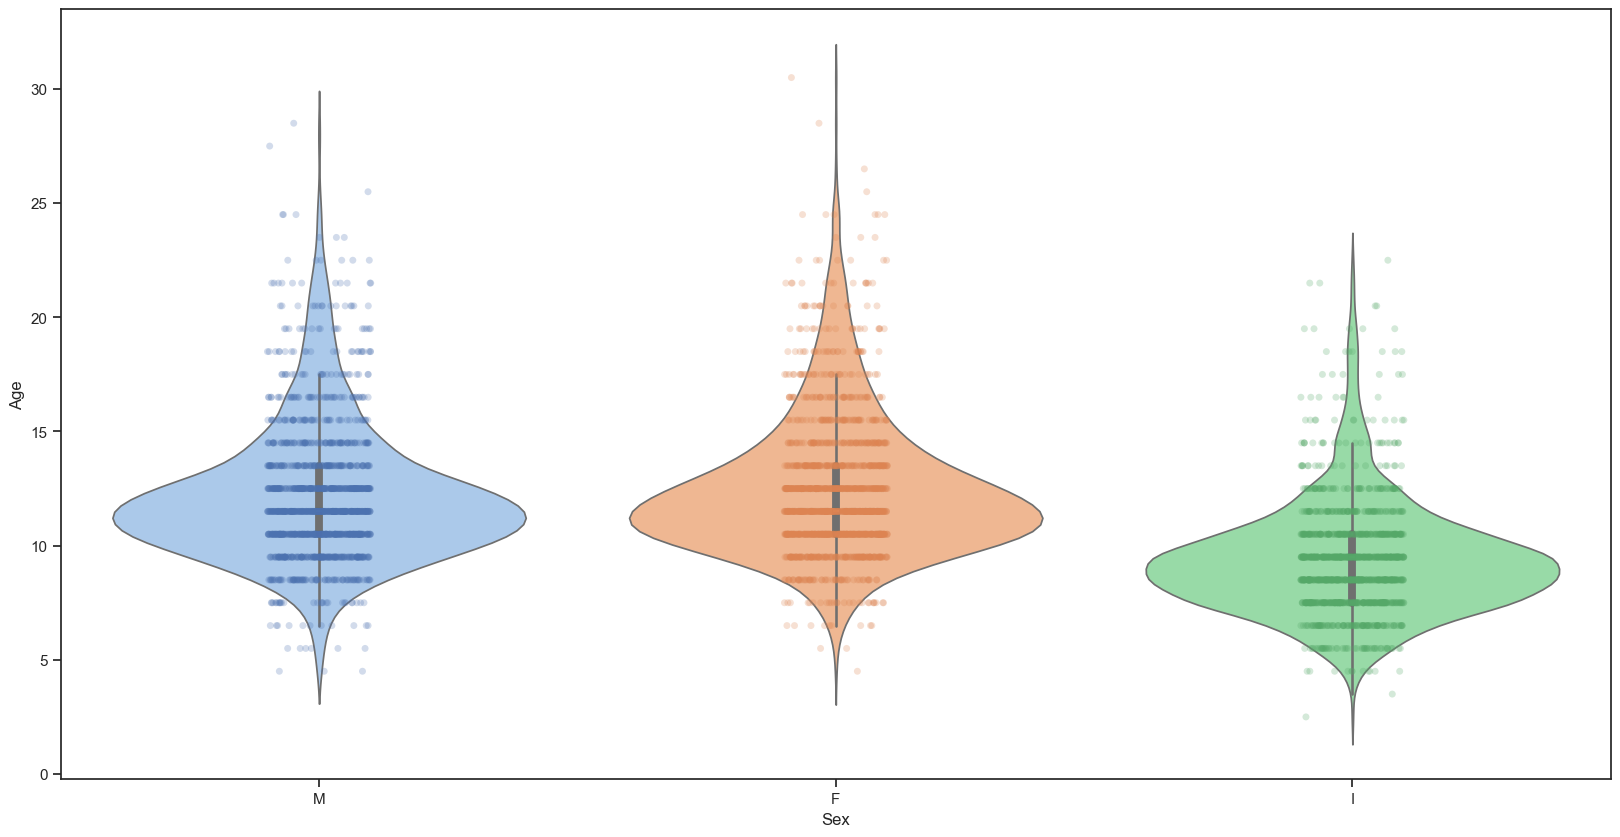

In [286]:
plt.figure(figsize = (20,10))
sns.stripplot(x='Sex', y='Age', data=df, hue='Sex', alpha=0.25)
sns.violinplot(x='Sex', y='Age', data=df, hue='Sex', palette='pastel')

In [287]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age']].mean().sort_values('Age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
I,0.427273,0.328382,0.107931,0.438131,0.190446,0.091764,0.129879,9.372257
M,0.560059,0.438072,0.150847,0.977255,0.429882,0.214179,0.279422,12.178645
F,0.572978,0.448652,0.155959,1.017649,0.437435,0.225124,0.294600,12.501376


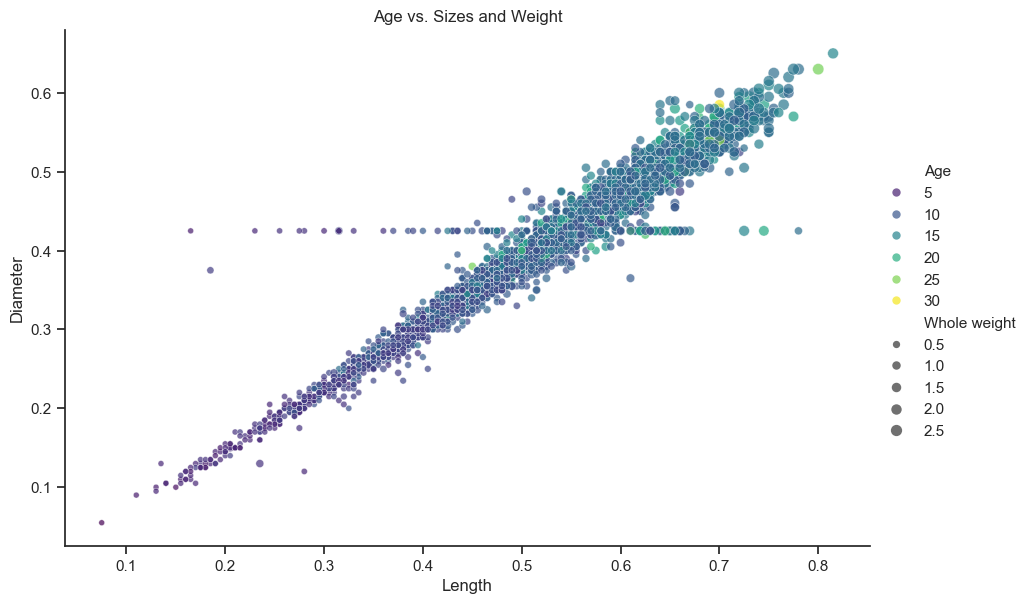

In [288]:
sns.relplot(x='Length', y='Diameter', hue='Age', size='Whole weight', data=df, height=6, aspect=1.5, alpha=0.7, palette='viridis')
plt.title("Age vs. Sizes and Weight")
plt.show()

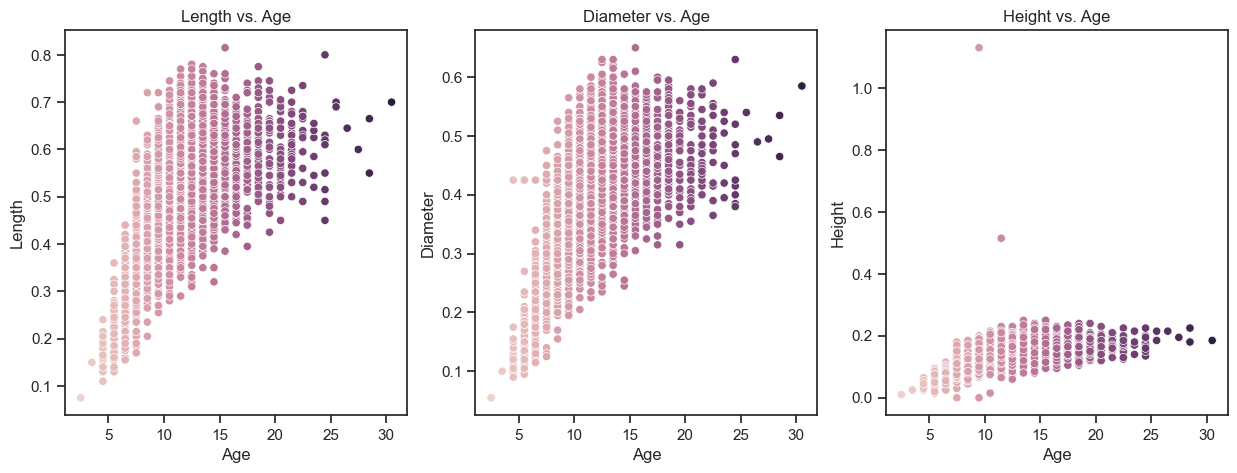

In [289]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.scatterplot(x='Age', y='Length', data=df, ax=axes[0], hue='Age', legend=False)
axes[0].set_title('Length vs. Age')

sns.scatterplot(x='Age', y='Diameter', data=df, ax=axes[1], hue='Age', legend=False)
axes[1].set_title('Diameter vs. Age')

sns.scatterplot(x='Age', y='Height', data=df, ax=axes[2], hue='Age', legend=False)
axes[2].set_title('Height vs. Age')

plt.show()

In [290]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


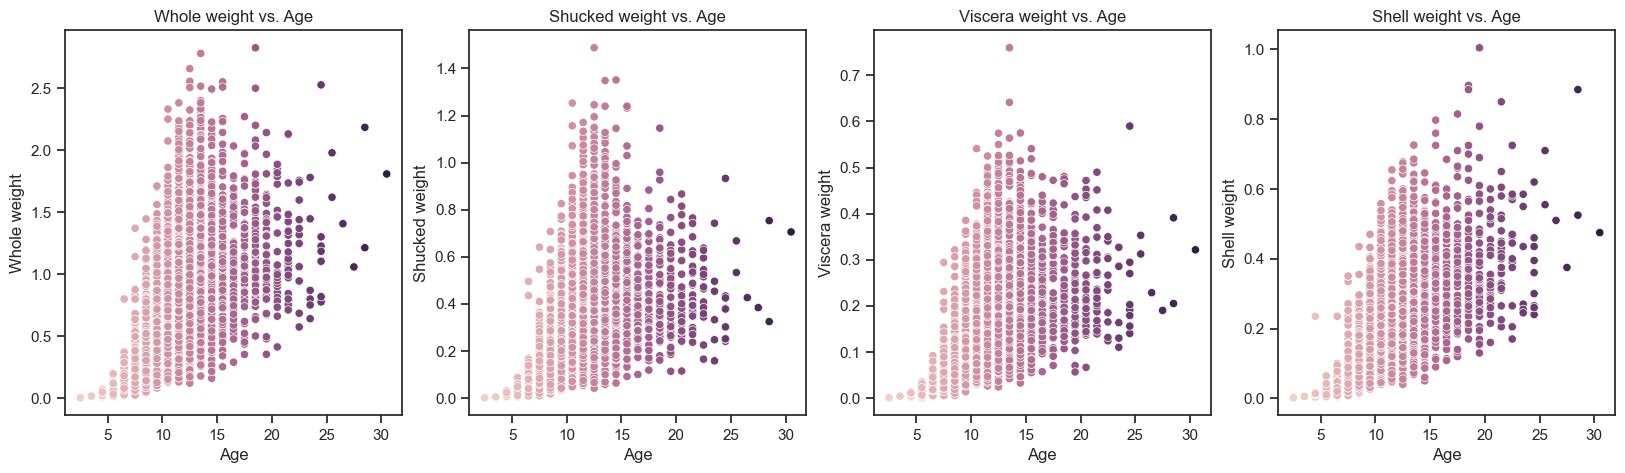

In [291]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

sns.scatterplot(x='Age', y='Whole weight', data=df, ax=axes[0], hue='Age', legend=False)
axes[0].set_title('Whole weight vs. Age')

sns.scatterplot(x='Age', y='Shucked weight', data=df, ax=axes[1], hue='Age', legend=False)
axes[1].set_title('Shucked weight vs. Age')

sns.scatterplot(x='Age', y='Viscera weight', data=df, ax=axes[2], hue='Age', legend=False)
axes[2].set_title('Viscera weight vs. Age')

sns.scatterplot(x='Age', y='Shell weight', data=df, ax=axes[3], hue='Age', legend=False)
axes[3].set_title('Shell weight vs. Age')

plt.show()

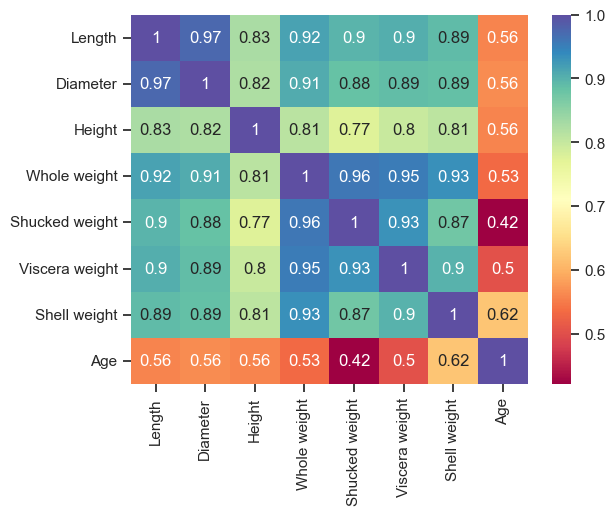

In [292]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="Spectral");

Checking categorical parameter Sex and Age

ANOVA

In [293]:
from scipy.stats import f_oneway

CategoryGroupLists = df.groupby('Sex')['Age'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  2.35303895865748e-182
Features are correlated


<p style="font-size:120%;font-weight:bold;text-align:left">5. Findings</p>

- The correlation matrix heatmap shows that there are strong positive correlations between the physical measurements of abalones (length, diameter, height, and weight)
- The age of abalones increases with their length, diameter, height and weight
- Whole Weight is almost linearly varying with all other features except Age
- Heigh has least linearity with remaining features
- Age is most correlated with Shell Weight
- Age is least correlated with Shucked Weight
- The target Age is normally distributed with a leftward shift. It might be necessary to handle the tails separately.

<p style="font-size:120%;font-weight:bold;text-align:left">6. Polaris vs Pandas</p>

In [294]:
df_big = df.copy()

for i in range(250):
    df_big = pd.concat([df_big, df])
    
df_big.shape

(1048427, 9)

In [295]:
df_big.to_csv('data/abalone_big.csv', index=False)

In [296]:
import polars as pl

In [297]:
%%time
df_pl = pl.read_csv('data/abalone_big.csv')

CPU times: user 209 ms, sys: 38.7 ms, total: 248 ms
Wall time: 59.7 ms


In [298]:
%%time 
df_pd = pd.read_csv('data/abalone_big.csv')

CPU times: user 304 ms, sys: 39.2 ms, total: 343 ms
Wall time: 353 ms


In [299]:
%%time
df_pl.filter((pl.col('Age') > 7) & (pl.col('Age') < 15) & (pl.col('Sex') == 'F'))

CPU times: user 19.5 ms, sys: 7.98 ms, total: 27.5 ms
Wall time: 14.7 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
str,f64,f64,f64,f64,f64,f64,f64,f64
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,10.5
"""F""",0.535,0.405,0.145,0.6845,0.2725,0.171,0.205,11.5
"""F""",0.47,0.355,0.1,0.4755,0.1675,0.0805,0.185,11.5
"""F""",0.44,0.34,0.1,0.451,0.188,0.087,0.13,11.5
"""F""",0.565,0.44,0.155,0.9395,0.4275,0.214,0.27,13.5
"""F""",0.55,0.415,0.135,0.7635,0.318,0.21,0.2,10.5
"""F""",0.615,0.48,0.165,1.1615,0.513,0.301,0.305,11.5
"""F""",0.56,0.44,0.14,0.9285,0.3825,0.188,0.3,12.5
"""F""",0.58,0.45,0.185,0.9955,0.3945,0.272,0.285,12.5


In [300]:
%%time
df_pl.filter((pl.col('Age') > 7) & (pl.col('Age') < 15) & (pl.col('Sex') == 'F'))

CPU times: user 17.4 ms, sys: 2.89 ms, total: 20.3 ms
Wall time: 13.7 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
str,f64,f64,f64,f64,f64,f64,f64,f64
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,10.5
"""F""",0.535,0.405,0.145,0.6845,0.2725,0.171,0.205,11.5
"""F""",0.47,0.355,0.1,0.4755,0.1675,0.0805,0.185,11.5
"""F""",0.44,0.34,0.1,0.451,0.188,0.087,0.13,11.5
"""F""",0.565,0.44,0.155,0.9395,0.4275,0.214,0.27,13.5
"""F""",0.55,0.415,0.135,0.7635,0.318,0.21,0.2,10.5
"""F""",0.615,0.48,0.165,1.1615,0.513,0.301,0.305,11.5
"""F""",0.56,0.44,0.14,0.9285,0.3825,0.188,0.3,12.5
"""F""",0.58,0.45,0.185,0.9955,0.3945,0.272,0.285,12.5


In [303]:
%%time
df_pd[(df_pd['Age'] > 7) & (df_pd['Age'] < 15) & (df_pd['Sex'] == 'F')]

CPU times: user 40.1 ms, sys: 4.1 ms, total: 44.2 ms
Wall time: 45.5 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
13,F,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.2050,11.5
14,F,0.470,0.355,0.100,0.4755,0.1675,0.0805,0.1850,11.5
17,F,0.440,0.340,0.100,0.4510,0.1880,0.0870,0.1300,11.5
22,F,0.565,0.440,0.155,0.9395,0.4275,0.2140,0.2700,13.5
...,...,...,...,...,...,...,...,...,...
1048410,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,12.5
1048411,F,0.585,0.455,0.170,0.9945,0.4255,0.2630,0.2845,12.5
1048418,F,0.515,0.400,0.125,0.6150,0.2865,0.1230,0.1765,9.5
1048422,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5


In [304]:
%%time
df_pl.group_by('Sex').agg(pl.mean('Diameter'))

CPU times: user 22.9 ms, sys: 9.35 ms, total: 32.2 ms
Wall time: 17.9 ms


Sex,Diameter
str,f64
"""M""",0.438072
"""F""",0.448652
"""I""",0.328382


In [305]:
%%time
df_pd.groupby('Sex').agg({'Diameter' : 'mean'})

CPU times: user 35.5 ms, sys: 3.3 ms, total: 38.8 ms
Wall time: 37.8 ms


,Diameter
Sex,
F,0.448652
I,0.328382
M,0.438072


- Import - Polars
- Filter - Polars
- Grouping - Polars